# Importing libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Data set and exploration

In [9]:
df=pd.read_csv('winequalityN.csv')

In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# Imputing null values with mean method

In [13]:
for col, values in df.items():
    if col != 'type':
        df[col]=df[col].fillna(df[col].mean())

In [14]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Creating Box/Violin subplots, checking for outliers and distribution around quartiles

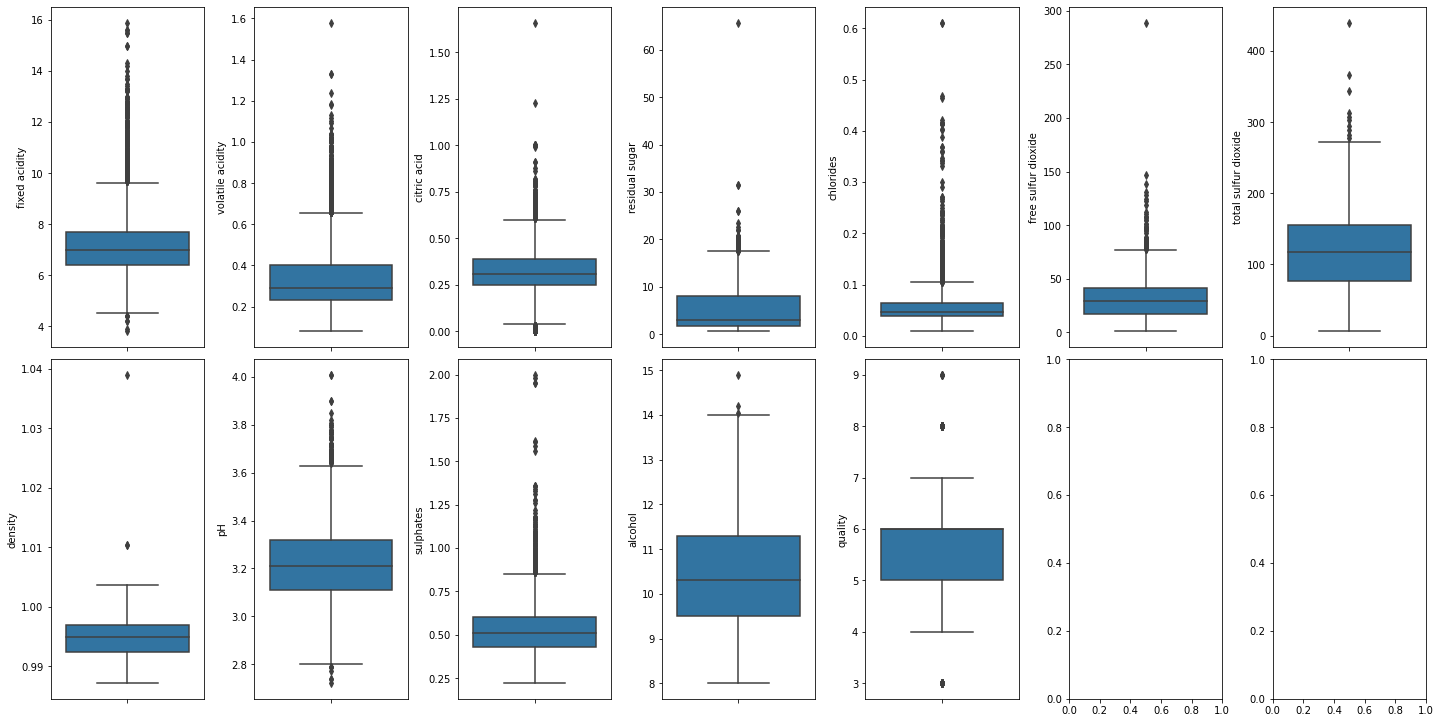

In [18]:
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10)) 
index=0
ax=ax.flatten()
for col, value in df.items():
    if col !='type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)

In [21]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
#It appears that there exist outliers which need to be fixed 

# Removing outliers

In [25]:
def outliers (df,ft):   
    Q1=df[ft].quantile (0.25)
    Q3=df[ft].quantile (0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=df.index[(df[ft]< lower_bound) | (df[ft]> upper_bound)]
    return ls

index_list=[]
for feature in ['citric acid','residual sugar','density','free sulfur dioxide','quality']:
    index_list.extend(outliers(df, feature))
print (index_list)

def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df
#### df_cleaned is new df without outliers ###
df_cleaned=remove(df,index_list)
df=df_cleaned

[218, 694, 967, 972, 998, 1090, 1950, 1954, 1999, 2110, 2111, 2112, 2115, 2250, 2269, 2434, 2536, 2543, 3037, 3042, 3113, 3124, 3144, 3145, 3146, 3148, 3151, 3784, 3795, 4121, 4418, 4419, 4420, 4421, 4424, 4454, 4460, 6332, 6333]


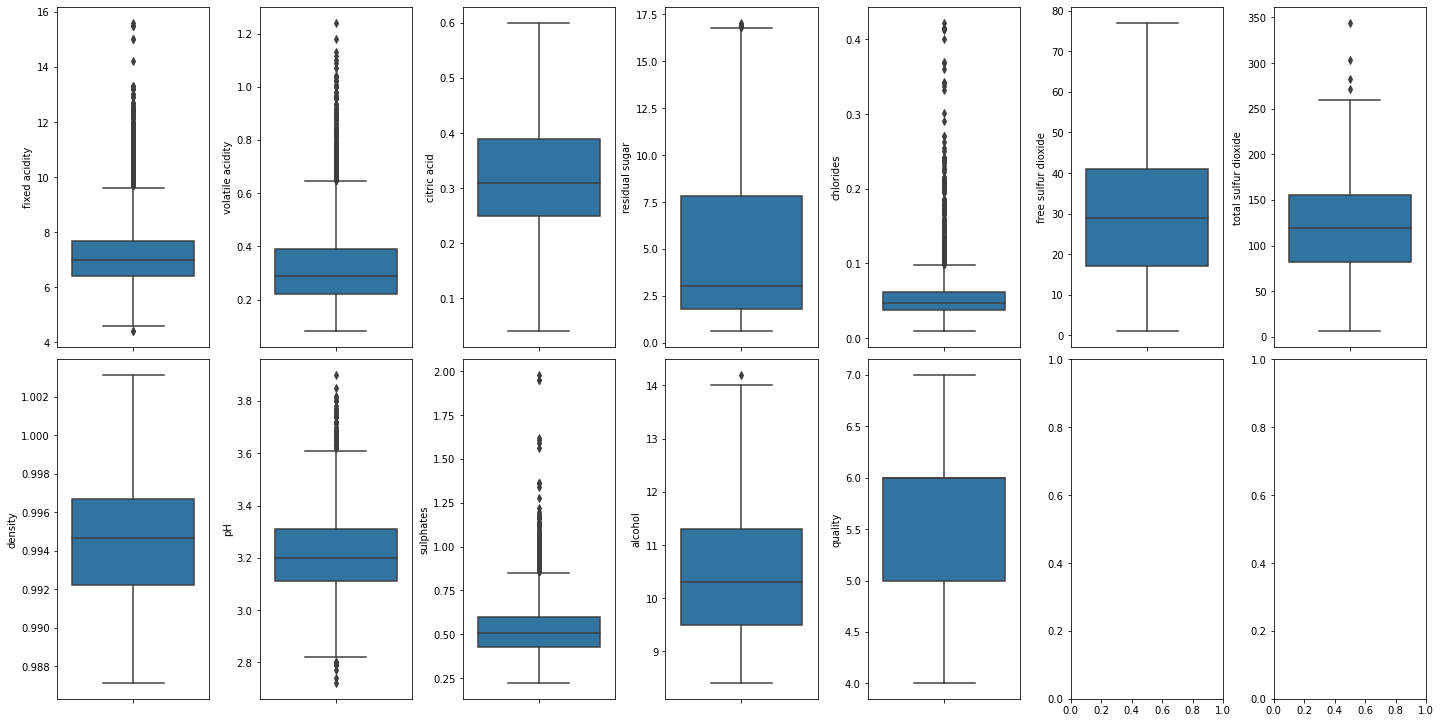

In [26]:
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10)) 
index=0
ax=ax.flatten()
for col, value in df.items():
    if col !='type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)

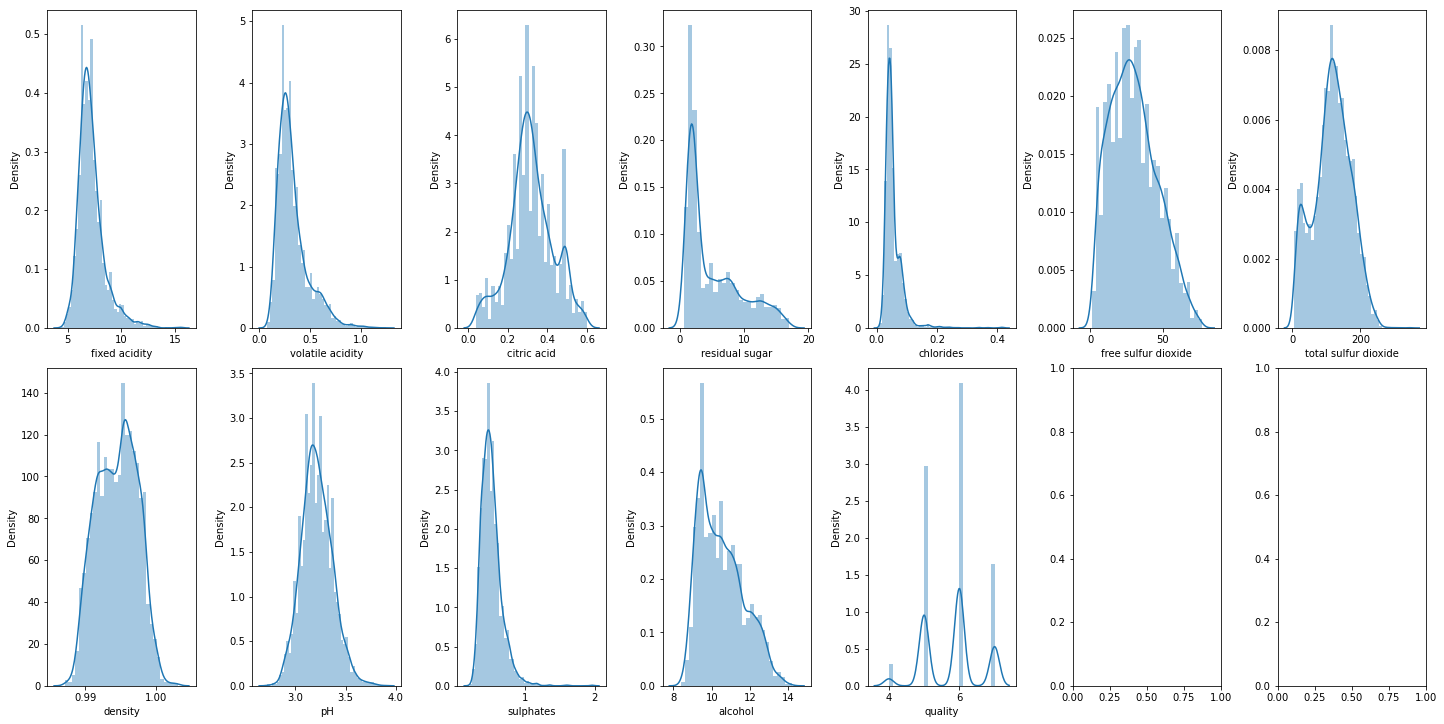

In [27]:

fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10)) 
index=0
ax=ax.flatten()
for col, value in df.items():
    if col !='type':
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)

<AxesSubplot:xlabel='type', ylabel='count'>

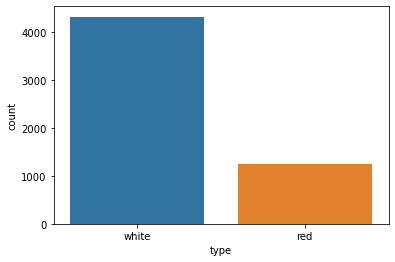

In [28]:
sns.countplot(df['type'])

In [34]:
df['type'].value_counts()

white    4317
red      1256
Name: type, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

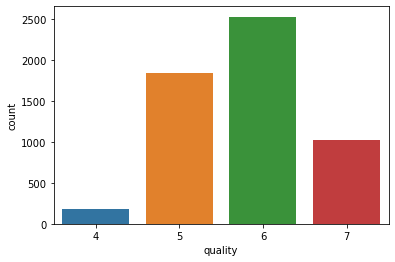

In [31]:
sns.countplot(df['quality'])

In [35]:
df['quality'].value_counts()

6    2533
5    1840
7    1019
4     181
Name: quality, dtype: int64

# Correlation Matrix

<AxesSubplot:>

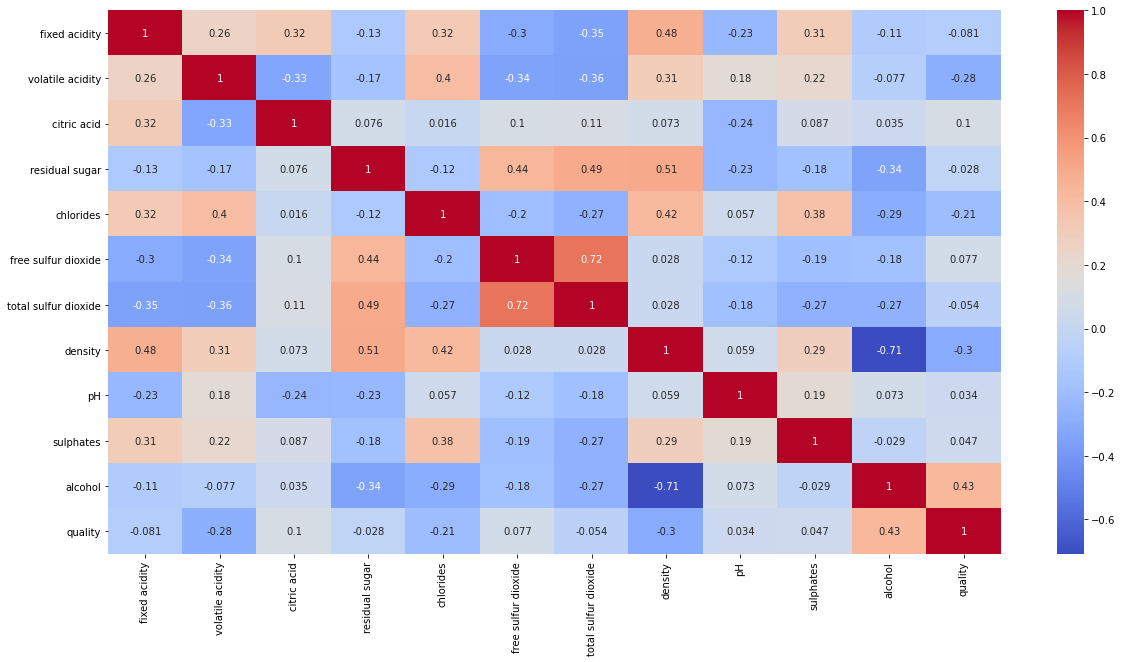

In [30]:
corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
X=df.drop(columns=['free sulfur dioxide','quality','type'])
y=df['quality']

# Imbalancement class using SMOTE and imblearn

In [42]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
X,y=oversample.fit_resample(X,y)

In [43]:
y.value_counts()

4    2533
5    2533
6    2533
7    2533
Name: quality, dtype: int64

In [44]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model,X,y):
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)
    
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test)*100)
    
    score=cross_val_score(model,X,y,cv=5)
    print ("CV Score:", np.mean(score)*100)

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy: 43.18989340702724
CV Score: 36.9515781763566


In [46]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy: 70.70667193051717
CV Score: 61.261883623403904


In [47]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy: 79.31306750888275
CV Score: 70.08530446085447


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy: 80.61587050927753
CV Score: 71.13145779752219


# Extra Trees Classifier is the most accurate classifier